In [20]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_experiments.library.tomography import StateTomography
from qiskit.visualization import plot_state_city
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.quantum_info import state_fidelity

## Mapeamento 
- Criação de um circuito com o estado maximente emaranhado $\ket{\Psi^-}$

#### Matemática do circuito
- Estado inicial
$$|\psi_0\rangle = |00\rangle$$

- Passo 1: X no qubit 1
$$|\psi_1\rangle = (I \otimes X) |00\rangle = |01\rangle$$

- Passo 2: H no qubit 0
$$|\psi_2\rangle = (H \otimes I) |01\rangle = (H|0\rangle) \otimes |1\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \otimes |1\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |11\rangle)$$

- Passo 3: CNOT (controle 0, alvo 1)
$$|\psi_3\rangle = \text{CNOT}_{0 \to 1} |\psi_2\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)$$

- Passo 4: Z no qubit 0
$$|\psi_4\rangle = (Z \otimes I) |\psi_3\rangle = \frac{1}{\sqrt{2}} (Z|0\rangle \otimes |1\rangle + Z|1\rangle \otimes |0\rangle)$$

- Z opera: Z|0> = |0>, Z|1> = -|1>$$
$$|\psi_4\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle) = |\Psi^{-}\rangle$$

- Logo, temos:
$$|\Psi^{-}\rangle = (Z \otimes I)\,\text{CNOT}_{0 \to 1}\,(H \otimes I)\,(I \otimes X)\,|00\rangle$$


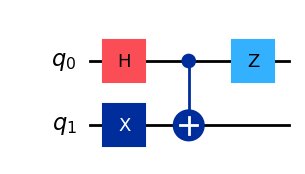

In [21]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.z(0)

qc.draw("mpl")

## Estado Vetorial Ideal

In [22]:
qc_sv = Statevector.from_label('00').evolve(qc)
Estado_bell_ideal = DensityMatrix(qc_sv)
print(Estado_bell_ideal)

DensityMatrix([[ 0. +0.j,  0. -0.j,  0. +0.j,  0. +0.j],
               [ 0. +0.j,  0.5+0.j, -0.5+0.j,  0. +0.j],
               [ 0. +0.j, -0.5-0.j,  0.5+0.j,  0. +0.j],
               [ 0. +0.j,  0. -0.j,  0. +0.j,  0. +0.j]],
              dims=(2, 2))


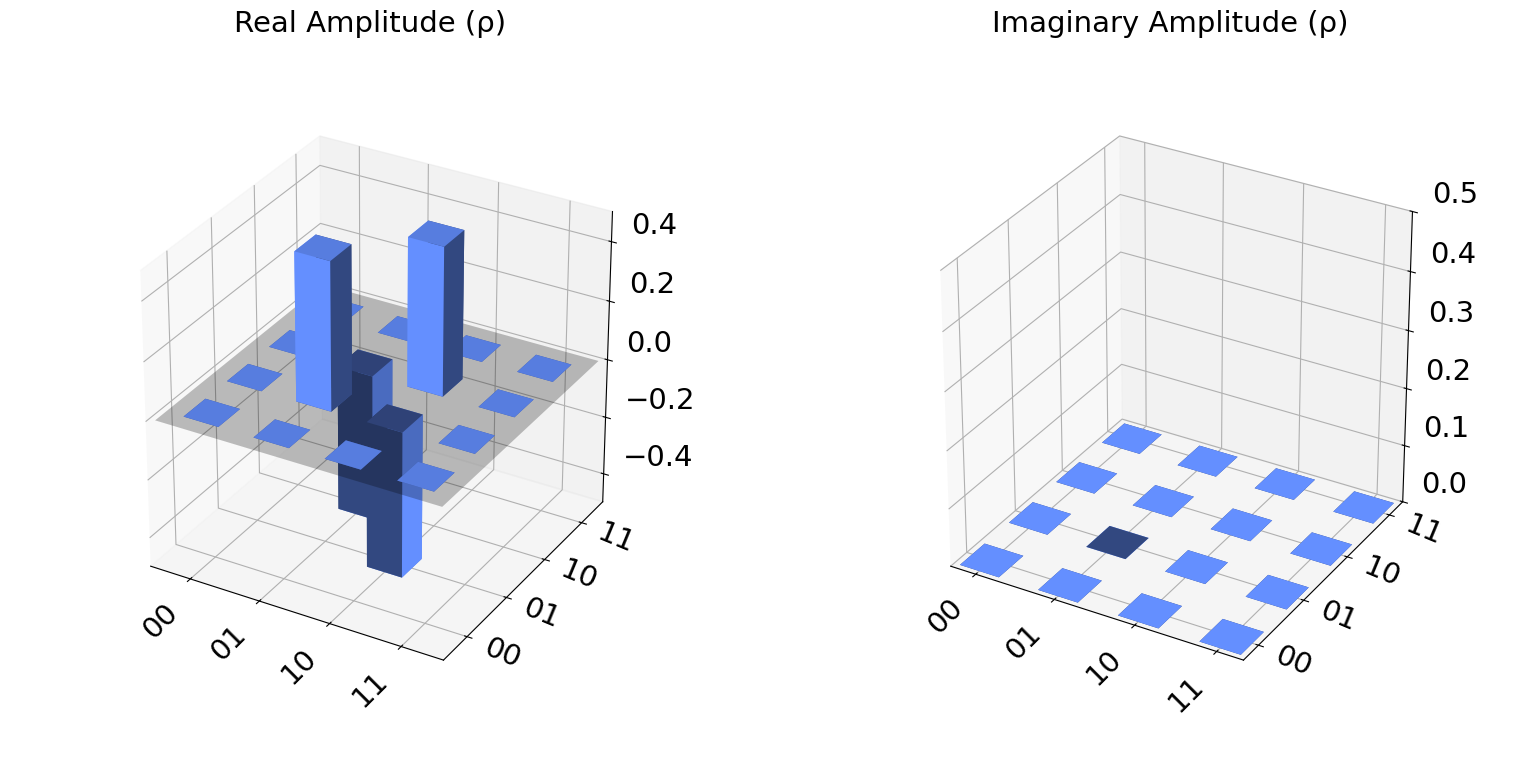

In [23]:
## Visulização do estado vetorial na cidade quântica
plot_state_city(Estado_bell_ideal)

## Tomografia
- A tomografia quântica é um procedimento experimental usado para reconstruir a matriz densidade de um sistema quântico a partir de medição de várias bases 

- Matriz densidade é um objeto matemático que descreve completamente o estado quântico, com cada probabilidade na base computacional e coerência quântica(Termos fora da diagonal)

$$
\rho =
\begin{bmatrix}
\rho_{00,00} & \rho_{00,01} & \rho_{00,00} & \rho_{00,11} \\
\rho_{01,00} & \rho_{01,01} & \rho_{01,10} & \rho_{01,11} \\
\rho_{10,00} & \rho_{10,01} & \rho_{10,10} & \rho_{10,11} \\
\rho_{11,00} & \rho_{11,01} & \rho_{11,10} & \rho_{11,11}
\end{bmatrix}
$$

- Diagonais: $\rho_{00,00}$, $\rho_{01,01}$, $\rho_{10,10}$ e $\rho_{11,11}$, são as probabilidade de medir $\ket{00},\ket{01},\ket{10} ,\ket{11}$

- Fora da diagonal: 

#### O que a tomografia pode fornecer ?
- Calcular a fidelidade com o estado ideal


## Execução da tomografia
- Criação de um experimento de tomografia 
- Execução do circuito várias vezes medindo em múltiplas bases para reconstruir todos os elementos de matriz densidade.

In [24]:
tomografia = StateTomography(qc)

simulator = AerSimulator()
result = tomografia.run(simulator, shots =40000).block_for_results()
Estado_Bell_não_ideal =result.analysis_results("state").value
print(Estado_Bell_não_ideal.data)

[[ 2.70837230e-04+0.00000000e+00j -9.07753746e-04+1.66581984e-04j
   6.75670010e-04+5.53839941e-05j  5.89405544e-05+4.25724958e-04j]
 [-9.07753746e-04-1.66581984e-04j  5.02341508e-01+0.00000000e+00j
  -4.99318785e-01-6.49268372e-04j  4.20360906e-04+1.66671064e-03j]
 [ 6.75670010e-04-5.53839941e-05j -4.99318785e-01+6.49268372e-04j
   4.96685760e-01+6.93889390e-18j -1.20760331e-04-2.06657154e-03j]
 [ 5.89405544e-05-4.25724958e-04j  4.20360906e-04-1.66671064e-03j
  -1.20760331e-04+2.06657154e-03j  7.01894882e-04+1.35525272e-20j]]


C:\Users\ianre\AppData\Local\Temp\ipykernel_12268\3527698743.py:5: DeprecationWarning: Leaving `dataframe` unset or setting it to `False` for `ExperimentData.analysis_results` is deprecated as of qiskit-experiments 0.9.0. Future releases may change the default to `True` and remove the option to set the value to `False`.
  Estado_Bell_não_ideal =result.analysis_results("state").value


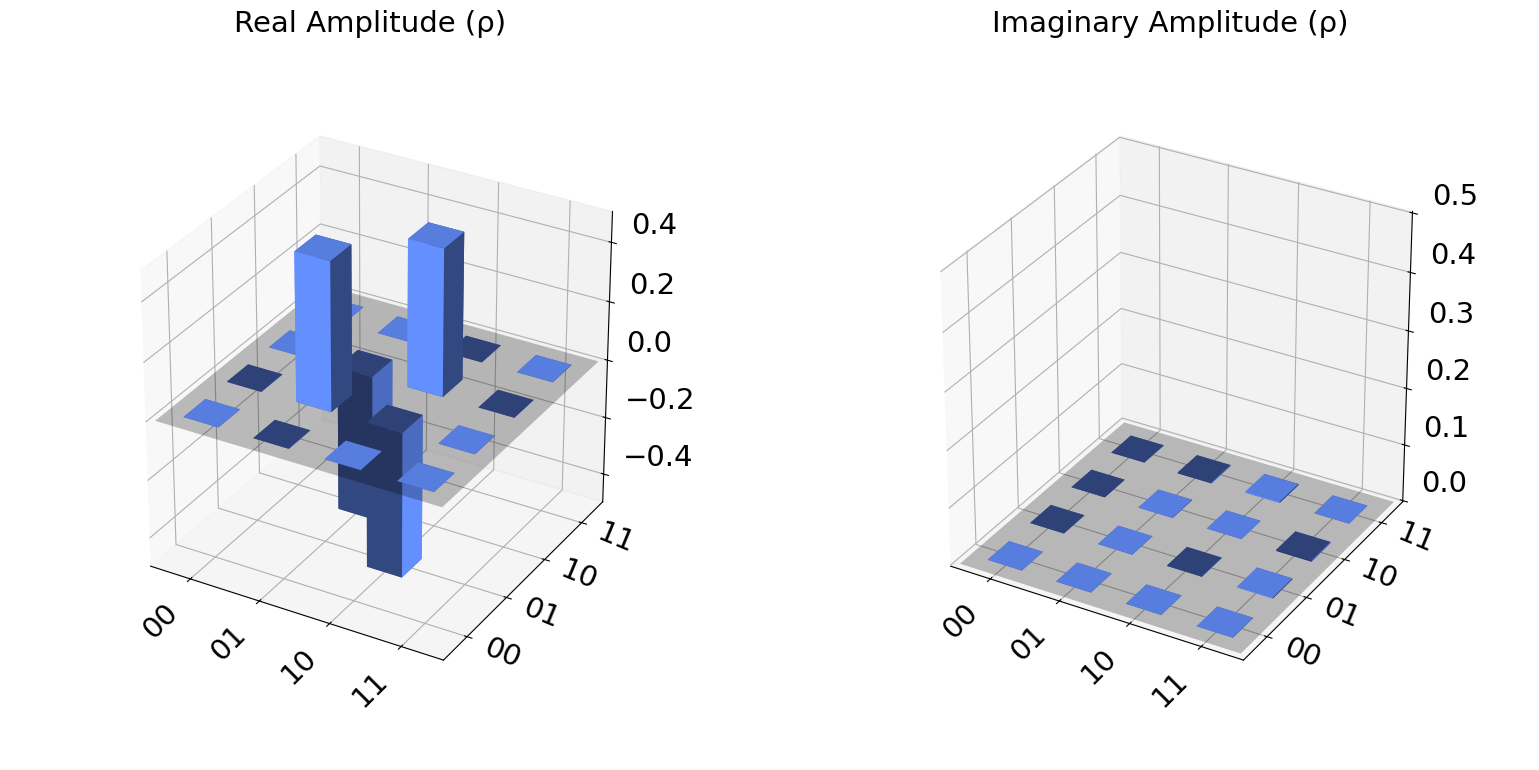

In [25]:
plot_state_city(Estado_Bell_não_ideal)

In [26]:
fidelidade = state_fidelity(Estado_bell_ideal, Estado_Bell_não_ideal)
print(f"Fidelidade do estado: {fidelidade:.4}")

Fidelidade do estado: 0.9988
